In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./data/survey-results-public.csv')
df.shape

(51392, 154)

In [3]:
df = df[['Professional', 'YearsCodedJob', 'ImportantBenefits']]
df.shape

(51392, 3)

In [4]:
df['Professional'].value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [5]:
df = df[df['Professional'].isin(('Professional developer','Professional non-developer who sometimes writes code','Used to be a professional developer'))]
df.shape

(42254, 3)

In [6]:
df.describe()

,Professional,YearsCodedJob,ImportantBenefits
count,42254,40886,25775
unique,3,21,3269
top,Professional developer,1 to 2 years,None of these
freq,36131,5289,442


In [7]:
df = df.dropna(subset=['ImportantBenefits', 'YearsCodedJob'], axis=0)
df.describe()

,Professional,YearsCodedJob,ImportantBenefits
count,24989,24989,24989
unique,2,21,3208
top,Professional developer,1 to 2 years,None of these
freq,22116,3059,422


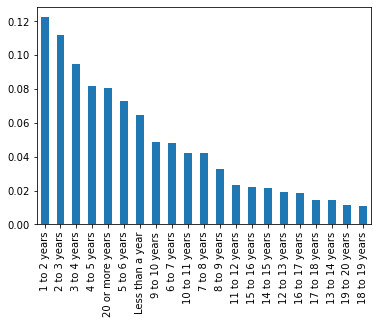

In [8]:
years_code_job_ratio = df['YearsCodedJob'].value_counts()/df.shape[0]
years_code_job_ratio.plot(kind='bar');

In [9]:
benefits_column = df['ImportantBenefits']
benefits_options = []
for row in benefits_column:
    for x in (x for x in row.split('; ') if x not in benefits_options):
        benefits_options.append(x)
benefits_options.sort()
benefits_options

['Annual bonus',
 'Charitable match',
 'Child/elder care',
 'Education sponsorship',
 'Equipment',
 'Expected work hours',
 'Health benefits',
 'Long-term leave',
 'Meals',
 'None of these',
 'Other',
 'Private office',
 'Professional development sponsorship',
 'Remote options',
 'Retirement',
 'Stock options',
 'Vacation/days off']

In [10]:
takeaway1 = pd.DataFrame(index=benefits_options)

In [11]:
for years_code_job in df['YearsCodedJob'].value_counts().keys():

    benefits_vals = {x:0 for x in benefits_options}
    
    benefits_column = df.loc[df['YearsCodedJob'] == years_code_job, 'ImportantBenefits']

    for options in (row.split('; ') for row in benefits_column):
        for option in options:
            benefits_vals[option] += 1
    takeaway1[years_code_job] = pd.Series(benefits_vals) / years_code_job_ratio[years_code_job] / df.shape[0]

In [12]:
takeaway1

,1 to 2 years,2 to 3 years,3 to 4 years,4 to 5 years,20 or more years,5 to 6 years,Less than a year,9 to 10 years,6 to 7 years,10 to 11 years,...,8 to 9 years,11 to 12 years,15 to 16 years,14 to 15 years,12 to 13 years,16 to 17 years,17 to 18 years,13 to 14 years,19 to 20 years,18 to 19 years
Annual bonus,0.329519,0.343000,0.332770,0.342760,0.295837,0.337719,0.321384,0.345365,0.331947,0.333333,...,0.314634,0.337370,0.304114,0.335780,0.316770,0.331183,0.295580,0.307479,0.281787,0.307116
Charitable match,0.028441,0.027927,0.025370,0.026816,0.028741,0.029057,0.032138,0.018048,0.020799,0.025496,...,0.017073,0.019031,0.017889,0.022018,0.018634,0.015054,0.030387,0.011080,0.010309,0.022472
Child/elder care,0.080745,0.081275,0.082875,0.090687,0.054014,0.090461,0.072930,0.105824,0.095674,0.117092,...,0.109756,0.103806,0.105546,0.097248,0.091097,0.107527,0.069061,0.091413,0.079038,0.078652
Education sponsorship,0.226218,0.186180,0.177167,0.167235,0.082260,0.164474,0.229295,0.132075,0.148918,0.144476,...,0.150000,0.107266,0.128801,0.141284,0.091097,0.120430,0.088398,0.108033,0.113402,0.093633
Equipment,0.391304,0.411028,0.416490,0.420770,0.363726,0.411732,0.379481,0.423298,0.421797,0.401322,...,0.423171,0.408304,0.382826,0.370642,0.418219,0.391398,0.403315,0.437673,0.415808,0.426966
Expected work hours,0.424975,0.427497,0.442283,0.454900,0.444500,0.446820,0.448702,0.439705,0.479201,0.451369,...,0.474390,0.453287,0.457961,0.486239,0.515528,0.477419,0.505525,0.454294,0.484536,0.460674
Health benefits,0.472377,0.486574,0.488372,0.469527,0.515362,0.466557,0.487639,0.478261,0.488353,0.466478,...,0.452439,0.484429,0.466905,0.434862,0.478261,0.466667,0.411602,0.423823,0.463918,0.501873
Long-term leave,0.146453,0.147512,0.151797,0.149196,0.075322,0.161732,0.155130,0.141920,0.148918,0.151086,...,0.147561,0.141869,0.105546,0.141284,0.167702,0.131183,0.118785,0.144044,0.109966,0.097378
Meals,0.211507,0.198711,0.184778,0.154559,0.040634,0.143640,0.210754,0.109106,0.123128,0.095373,...,0.124390,0.093426,0.067979,0.069725,0.064182,0.060215,0.027624,0.083102,0.072165,0.071161
None of these,0.025499,0.020408,0.016490,0.016577,0.026264,0.020833,0.016069,0.018048,0.019135,0.015109,...,0.013415,0.027682,0.016100,0.020183,0.012422,0.025806,0.008287,0.008310,0.027491,0.033708


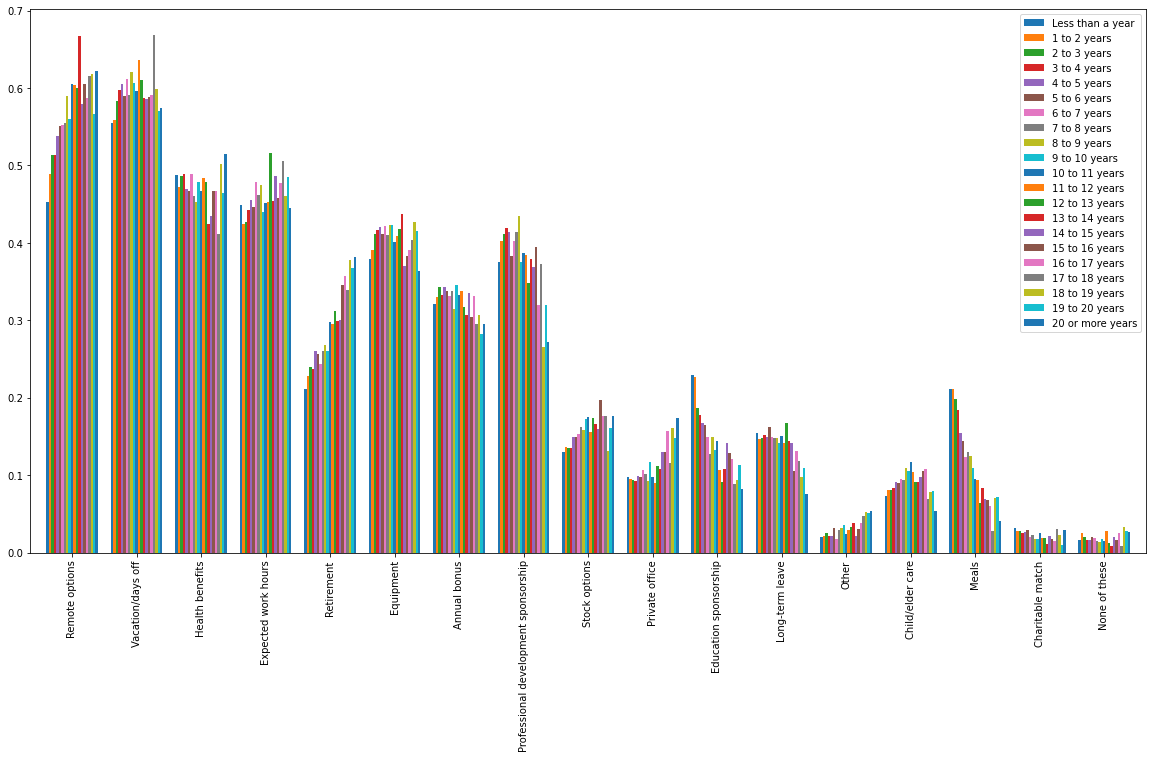

In [13]:
column_order = [
    'Less than a year',
    '1 to 2 years',
    '2 to 3 years',
    '3 to 4 years',
    '4 to 5 years',
    '5 to 6 years',
    '6 to 7 years',
    '7 to 8 years',
    '8 to 9 years',
    '9 to 10 years',
    '10 to 11 years',
    '11 to 12 years',
    '12 to 13 years',
    '13 to 14 years',
    '14 to 15 years',
    '15 to 16 years',
    '16 to 17 years',
    '17 to 18 years',
    '18 to 19 years',
    '19 to 20 years',
    '20 or more years'
]
takeaway1 = takeaway1[column_order]
index_order = [
    'Vacation/days off',
    'Remote options',
    'Health benefits',
    'Expected work hours',
    'Equipment',
    'Professional development sponsorship',
    'Annual bonus',
    'Retirement',
    'Stock options',
    'Education sponsorship',
    'Long-term leave',
    'Meals',
    'Private office',
    'Child/elder care',
    'Other',
    'Charitable match',
    'None of these'
]
takeaway1 = takeaway1.reindex(takeaway1['20 or more years'].sort_values(ascending=False).index)
takeaway1.plot(figsize=(20,10), kind='bar', width=0.8);

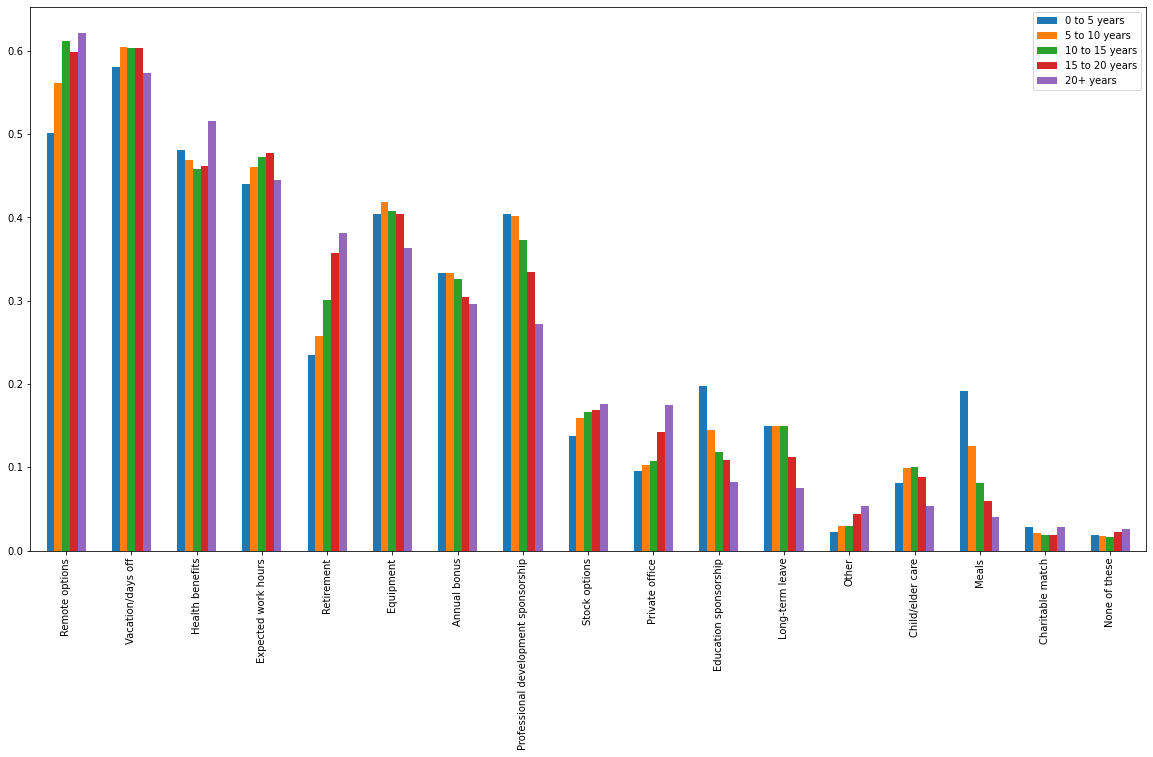

In [14]:
takeaway1a = pd.DataFrame(index=benefits_options)
takeaway1a['0 to 5 years'] = (takeaway1['Less than a year'] + takeaway1['1 to 2 years'] + takeaway1['2 to 3 years'] + takeaway1['3 to 4 years'] + takeaway1['4 to 5 years'])/5
takeaway1a['5 to 10 years'] = (takeaway1['5 to 6 years'] + takeaway1['6 to 7 years'] + takeaway1['7 to 8 years'] + takeaway1['8 to 9 years'] + takeaway1['9 to 10 years'])/5
takeaway1a['10 to 15 years'] = (takeaway1['10 to 11 years'] + takeaway1['11 to 12 years'] + takeaway1['12 to 13 years'] + takeaway1['13 to 14 years'] + takeaway1['14 to 15 years'])/5
takeaway1a['15 to 20 years'] = (takeaway1['15 to 16 years'] + takeaway1['16 to 17 years'] + takeaway1['17 to 18 years'] + takeaway1['18 to 19 years'] + takeaway1['19 to 20 years'])/5
takeaway1a['20+ years'] = takeaway1['20 or more years']
takeaway1a = takeaway1a.reindex(takeaway1['20 or more years'].sort_values(ascending=False).index)
takeaway1a.plot(figsize=(20,10), kind='bar', width=0.6);